<a href="https://colab.research.google.com/github/sayalikulk/House_price_prediction/blob/master/House_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Imported')

Imported


**Importing the data**

---


The dataset is saved as data.csv file. We will use pandas to take a look of the database

In [0]:
df = pd.read_csv('data.csv', header=None)
df.rename(columns={0: 'serial', 1: 'date', 2:'age', 3:'distance', 4:'stores', 5:'latitude', 6:'longitude', 7: 'price'}, inplace=True)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [0]:
df.shape

(5000, 8)

Check missing data using pandas

In [0]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

Dataset Normalization

In [0]:
df=df.iloc[:,1:]
df_norm=(df-df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [0]:
y_mean=df['price'].mean()
y_std=df['price'].std()

def convert_label_value(pred):
  return int(pred*y_std+y_mean)
print(convert_label_value(0.350088))

14263


Creating training and test sets

In [0]:
x=df_norm.iloc[:,:6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [0]:
y=df_norm.iloc[:,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [0]:
x_arr=x.values
y_arr=y.values
x_arr

array([[ 0.01597778,  0.18138426,  1.25700164,  0.34522379, -0.30721158,
        -1.26079862],
       [-0.35048517, -1.31911814, -0.93060999, -0.60931203,  0.32530146,
        -1.26079862],
       [ 1.29859812, -0.08341028, -0.61809404,  0.66340239,  1.59032754,
        -1.57645598],
       ...,
       [ 1.4818296 , -1.14258845,  1.56951759,  0.02704518,  1.59032754,
         0.00183081],
       [ 0.19920926,  1.59362182, -0.61809404,  0.02704518, -1.25598114,
         0.94880289],
       [ 1.66506107, -0.87779391, -1.24312594,  1.2997596 ,  1.59032754,
         0.63314553]])

In [0]:
x_train, x_test, y_train, y_test=train_test_split(x_arr,y_arr,test_size=0.05,random_state=0)
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((4750, 6), (4750,), (250, 6), (250,))

Create the model

In [0]:
def get_model():
  model=Sequential([
      Dense(10,input_shape=(6,),activation='relu'),
      Dense(20,activation='relu'),
      Dense(5,activation='relu'),
      Dense(1)
  ])
  model.compile(
      loss='mse',
      optimizer='adam',
      metrics=['accuracy']
  )
  return model

get_model().summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_37 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


Model training


---

We can use Early stopping callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs

In [0]:
es_cb=EarlyStopping(monitor='val_loss', patience=5) 
#it will monitor the val_loss for 5 epochs before shutting the training
model=get_model()
preds_on_untrained=model.predict(x_test)
history=model.fit(
    x_train,y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[es_cb]
)

Epoch 1/100
149/149 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.0000e+00 - val_loss: 0.5087 - val_accuracy: 0.0000e+00
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.0000e+00 - val_loss: 0.2067 - val_accuracy: 0.0000e+00
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.0000e+00 - val_loss: 0.1696 - val_accuracy: 0.0000e+00
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.0000e+00 - val_loss: 0.1644 - val_accuracy: 0.0000e+00
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.0000e+00 - val_loss: 0.1590 - val_accuracy: 0.0000e+00
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.0000e+00 - val_loss: 0.1573 - val_accuracy: 0.0000e+00
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 

In [0]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [0]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return                  

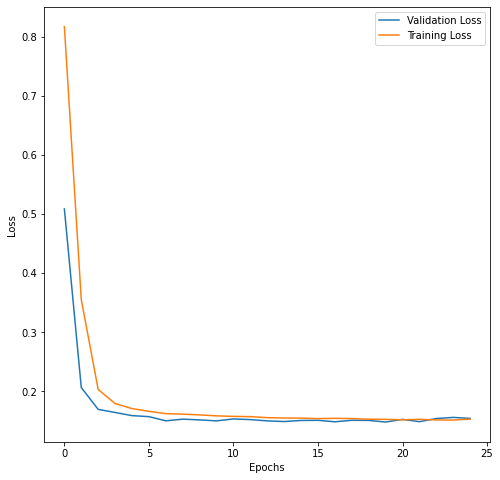

In [0]:
plot_loss(history)

In [0]:
def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

In [0]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

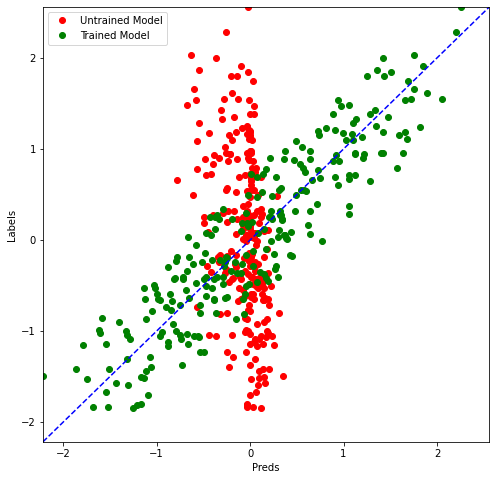

In [0]:
preds_on_trained=model.predict(x_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

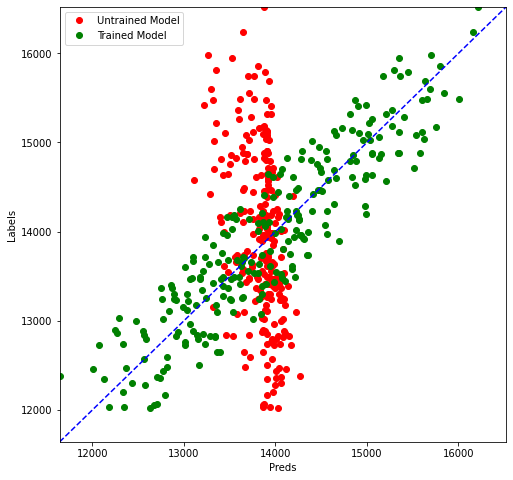

In [0]:
price_untrained=[convert_label_value(y) for y in preds_on_untrained]
price_trained=[convert_label_value(y) for y in preds_on_trained]
price_test=[convert_label_value(y) for y in y_test]

compare_predictions(price_untrained, price_trained, price_test)